In [1]:

# Requirements: Matplotlib, Numpy, functions_util.py, index.py#, fitting_functions_ZNE.py, h5py

import os

#Move the directory back to Duke_Data
#Check if the current directory is Duke_Data
if os.getcwd().split('/')[-1] != 'DUKE_ANALOG_ZNE_DATA':
    #os.chdir('Duke_Data')
    os.chdir('../')
    #print(os.getcwd().split('/')[-1])
    #pass
else:
    pass
#print(os.getcwd())
from scripts.index import print_index, get_experiment, index_folder
from functions_util import cetina_thermal_exp, cetina_envelope_exp
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.cm as cm
import numpy as np
import h5py
from fitting_functions_ZNE import linear_ZNE, third_no_first_ZNE


def fit(function, x_axis, y_axis, return_cov=False, p0=[.05,2000000], weights=None):
    # Fit the data to the function
    popt, pcov = curve_fit(function, x_axis, y_axis, p0=p0, sigma=weights, absolute_sigma=True, maxfev=10000)
    
    if return_cov:
        return popt, pcov
    return popt

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [2]:
# import all the useful lib in python
from matplotlib import artist as art
%matplotlib inline
import scipy as sp
# import pandas as pd
import pathlib
import os
import datetime as dt
import glob
from IPython.display import clear_output
from numpy.fft import fft, ifft

from h5analysis import *
from qsim_functions import*


In [3]:

#pairs = [(11,12), (12,13),(13,14)]
#bases = ['x', 'y', 'z']
#pairs_names = [265, 259, 266]
# basis_names = [268, 271, 269]
# foldername = 'Population_4_tw0'
# pairs_names = [str(name) for name in pairs_names]
# qubits = [11,12,13,14]
# shots = 150
foldername = 'parity_2_tfim'
#bases = ['x0', 'y0','x1','y1']

phases = np.array([0, 0.25, 0.5, 0.75, 1, 1.25, 0.125, 0.375, 0.625, 0.875])*np.pi
phase_names = [433, 434, 435, 436, 437, 438, 439, 440, 441, 442]
#bases = ['x0', 'x1', 'y0', 'y1']
qubits = [12,13]
shots = 2000
time_steps = 10



# for name_index in range(len(pairs_names)):
#     name = pairs_names[name_index]
#     if '000563' in pairs_names:
#         pass
#     else:
#         name = '000563' + name
#         pairs_names[name_index] = name
phase_names = [str(name) for name in phase_names]
for name_index in range(len(phase_names)):
    name = phase_names[name_index]
    if '000563' in phase_names:
        pass
    else:
        name = '000563' + name
        phase_names[name_index] = name
full_data_folder_path = './data/' + foldername + '/'


In [4]:
COUNTS_THRESHOLD = 1


In [10]:
measurement_data = np.zeros((time_steps, len(phase_names)), dtype=dict)
#flopping_matrix = np.zeros((30, len(pairs_names)))
#flopping_std_matrix = np.zeros((30, len(pairs_names)))
#times = None

expectations_matrix = np.zeros((time_steps,len(phase_names)))
qubit_0_magnetization = np.zeros((time_steps,len(phase_names)))
leakage_factor = np.zeros((time_steps,len(phase_names)))

print(os.getcwd())
for file_id_index in range(len(phase_names)):
    
    file_id = phase_names[file_id_index]
    phase = phases[file_id_index]
    #pair = names[0]
    file = h5py.File(full_data_folder_path + file_id + '-RFSoCSequence.h5', 'r')
    archive = file['archive']
    dataset = file['datasets']
    x_vals = dataset['data.rfsoc_pulse_sequence.x_values']
    times = np.array(x_vals)
    if file_id_index == 0:
        times_start = times
    if file_id_index == 3:
        times_end = times
    #print(times)
    raw_counts = dataset['data.rfsoc_pulse_sequence.raw_counts']
    counts = np.asarray(raw_counts)
    print(counts.shape)
    measurements = np.zeros((len(qubits), shots, time_steps))
    for qubit_index in range(len(qubits)):
        qubit = qubits[qubit_index]
        #qubit = pair[pair_index]
        measurements[qubit_index,:,:] = 1 < counts[qubit,:,:]
        #print(measurements)
    #Convert the measurements to bitstrings. Convert to string, then append the like indices
    counts_bitstrings = np.zeros((shots, time_steps), dtype='<U5')
    for i in range(shots):
        for j in range(time_steps):
            bitstring = [str(int(measurements[qubit_index,i,j])) for qubit_index in range(len(qubits))]
            bitstring = "".join(bitstring)
            counts_bitstrings[i,j] = bitstring
    counts_dicts = np.zeros(time_steps, dtype=dict)
    for j in range(time_steps):
        magnetization = 0
        for shot_index in range(shots):
            magnetization += measurements[0, shot_index, j]*2 - 1
        qubit_0_magnetization[j,file_id_index] = magnetization/shots
        temp_dict = {}#
        #{'0000':0, '1111':0}
        for i in range(shots):
            if counts_bitstrings[i,j] in temp_dict:
                temp_dict[counts_bitstrings[i,j]] += 1/shots
            else:
                temp_dict[counts_bitstrings[i,j]] = 1/shots
        counts_dicts[j] = temp_dict
        expectation = 0
        for key in temp_dict.keys():
            #count the number of zeros. If it is even, add the value. If it is odd, subtract the value
            num_zeros = key.count('0')
            if num_zeros % 2 == 0:
                expectation += temp_dict[key]
            else:
                expectation -= temp_dict[key]
        expectations_matrix[j,file_id_index] = expectation
        print(expectation)
    measurement_data[:,file_id_index] = counts_dicts
    
    

    
#print(counts_array)

/Users/thomassteckmann/Duke_Analog_ZNE_data
(23, 2000, 1)
0.2870000000000002
0.2870000000000002
0.2870000000000002
0.2870000000000002
0.2870000000000002
0.2870000000000002
0.2870000000000002
0.2870000000000002
0.2870000000000002
0.2870000000000002
(23, 2000, 1)
-0.16900000000000012
-0.16900000000000012
-0.16900000000000012
-0.16900000000000012
-0.16900000000000012
-0.16900000000000012
-0.16900000000000012
-0.16900000000000012
-0.16900000000000012
-0.16900000000000012
(23, 2000, 1)
-0.1930000000000002
-0.1930000000000002
-0.1930000000000002
-0.1930000000000002
-0.1930000000000002
-0.1930000000000002
-0.1930000000000002
-0.1930000000000002
-0.1930000000000002
-0.1930000000000002
(23, 2000, 1)
0.2630000000000001
0.2630000000000001
0.2630000000000001
0.2630000000000001
0.2630000000000001
0.2630000000000001
0.2630000000000001
0.2630000000000001
0.2630000000000001
0.2630000000000001
(23, 2000, 1)
0.3740000000000003
0.3740000000000003
0.3740000000000003
0.3740000000000003
0.3740000000000003
0

In [11]:
print(expectations_matrix)

[[ 0.287 -0.169 -0.193  0.263  0.374  0.004  0.07  -0.241  0.05   0.349]
 [ 0.287 -0.169 -0.193  0.263  0.374  0.004  0.07  -0.241  0.05   0.349]
 [ 0.287 -0.169 -0.193  0.263  0.374  0.004  0.07  -0.241  0.05   0.349]
 [ 0.287 -0.169 -0.193  0.263  0.374  0.004  0.07  -0.241  0.05   0.349]
 [ 0.287 -0.169 -0.193  0.263  0.374  0.004  0.07  -0.241  0.05   0.349]
 [ 0.287 -0.169 -0.193  0.263  0.374  0.004  0.07  -0.241  0.05   0.349]
 [ 0.287 -0.169 -0.193  0.263  0.374  0.004  0.07  -0.241  0.05   0.349]
 [ 0.287 -0.169 -0.193  0.263  0.374  0.004  0.07  -0.241  0.05   0.349]
 [ 0.287 -0.169 -0.193  0.263  0.374  0.004  0.07  -0.241  0.05   0.349]
 [ 0.287 -0.169 -0.193  0.263  0.374  0.004  0.07  -0.241  0.05   0.349]]


-0.3217472731710548


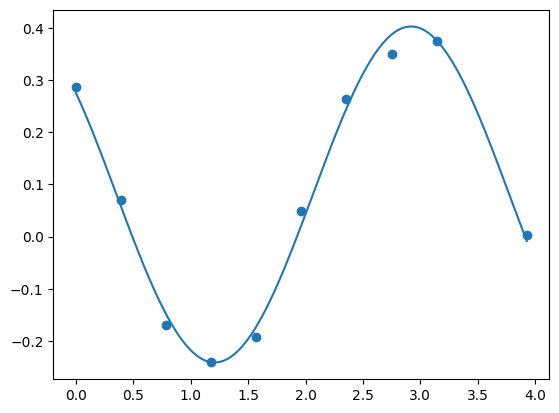

In [18]:
plt.scatter(phases, expectations_matrix[0,:])
#Fit to a sin function:
def sine(x, A, B, C, D):
    return A*np.sin(B*x + C) + D
phases_sorted = phases.copy()
phases_dense = np.linspace(0, 1.25*np.pi, 1000)
phases_sorted.sort()
popt, pcov = fit(sine, phases, expectations_matrix[0,:], return_cov=True, p0=[.5, 2, 0, 0])
plt.plot(phases_dense, sine(phases_dense, *popt))
print(popt[0])
